## K-means

In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.cluster import KMeans

In [53]:
df = pd.read_csv("C:\ITAM\ML\conchas.csv", encoding="ISO-8859-1")
df.head


<bound method NDFrame.head of      Sex  Length  Diameter  Height   Whole  Shucked  Viscera   Shell  Rings
0      M   0.455     0.365   0.095  0.5140   0.2245   0.1010  0.1500     15
1      M   0.350     0.265   0.090  0.2255   0.0995   0.0485  0.0700      7
2      F   0.530     0.420   0.135  0.6770   0.2565   0.1415  0.2100      9
3      M   0.440     0.365   0.125  0.5160   0.2155   0.1140  0.1550     10
4      I   0.330     0.255   0.080  0.2050   0.0895   0.0395  0.0550      7
5      I   0.425     0.300   0.095  0.3515   0.1410   0.0775  0.1200      8
6      F   0.530     0.415   0.150  0.7775   0.2370   0.1415  0.3300     20
7      F   0.545     0.425   0.125  0.7680   0.2940   0.1495  0.2600     16
8      M   0.475     0.370   0.125  0.5095   0.2165   0.1125  0.1650      9
9      F   0.550     0.440   0.150  0.8945   0.3145   0.1510  0.3200     19
10     F   0.525     0.380   0.140  0.6065   0.1940   0.1475  0.2100     14
11     M   0.430     0.350   0.110  0.4060   0.1675   0.08

In [54]:
df.describe()


,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [55]:
# Dividimos los datos

X=np.array(df.iloc[:,1:9])
y=np.array(df.iloc[:,0])
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=123)


In [56]:
# Estandarizamos los datos
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)


y_train = np.array(y_train)
y_test = np.array(y_test)

In [57]:
# Usamos un primer modelo de clasificación

rf = RandomForestClassifier()
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
rf_predict = rf.predict(X_test)

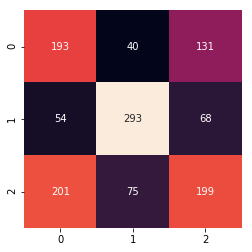

In [61]:

mc_rf = confusion_matrix(y_test, rf_predict)
sns.heatmap(mc_rf,square = True, annot = True, cbar = False, fmt='g')

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_predict)

0.54625199362041466

In [32]:
# Algoritmo k-means con 3 clusters

kmeans = KMeans(n_clusters=3, random_state=123).fit(X)


In [35]:
df["cluster"] = kmeans.predict(X)

In [38]:

ab_0 = df[df["cluster"]==0]
ab_1 = df[df["cluster"]==1]
ab_2 = df[df["cluster"]==2]

In [45]:
# Dividimos los datos
X_0 = ab_0.iloc[:,1:9]
y_0 = ab_0.iloc[:,0:1]
X_1 = ab_1.iloc[:,1:9]
y_1 = ab_1.iloc[:,0:1]
X_2 = ab_2.iloc[:,1:9]
y_2 = ab_2.iloc[:,0:1]

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, train_size=0.7,test_size=0.3)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, train_size=0.7,test_size=0.3)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, train_size=0.7,test_size=0.3)

# Estandarizamos
scaler_0 = StandardScaler()
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()

X_0_train = scaler_0.fit_transform(X_0_train)
X_0_test = scaler_0.transform(X_0_test)
y_0_train = np.array(y_0_train)
y_0_test = np.array(y_0_test)

X_1_train = scaler_1.fit_transform(X_1_train)
X_1_test = scaler_1.transform(X_1_test)
y_1_train = np.array(y_1_train)
y_1_test = np.array(y_1_test)

X_2_train = scaler_2.fit_transform(X_2_train)
X_2_test = scaler_2.transform(X_2_test)
y_2_train = np.array(y_2_train)
y_2_test = np.array(y_2_test)

In [47]:
# Generamos un Random forest para cada cluster

rf_0 = RandomForestClassifier()
rf_1 = RandomForestClassifier()
rf_2 = RandomForestClassifier()

rf_0.fit(X_0_train, y_0_train.ravel())
rf_1.fit(X_1_train, y_1_train.ravel())
rf_2.fit(X_2_train, y_2_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
rf_0_pred = rf_0.predict(X_0_test)
rf_1_pred = rf_1.predict(X_1_test)
rf_2_pred = rf_2.predict(X_2_test)

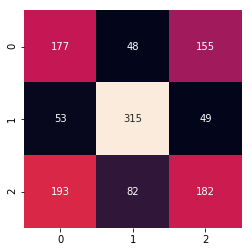

In [62]:
test_complete = np.concatenate((y_0_test, y_1_test, y_2_test), axis=0)
pred_complete = np.concatenate((rf_0_pred, rf_1_pred, rf_2_pred), axis=0)
mc_rf2 = confusion_matrix(test_complete, pred_complete)
sns.heatmap(mc_rf2,square = True, annot = True, cbar = False, fmt='g')


In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(test_complete, pred_complete)

0.53748006379585322

No se observa una mejoría en los resultados como se esperaba, al aplicar Random Forest a cada uno de los clusters